Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

# 1- Dominant colors in images


video

# 2- Extract RGB values from image


<p>There are broadly three steps to find the dominant colors in an image:</p>
<ul>
<li>Extract RGB values into three lists.</li>
<li>Perform k-means clustering on scaled RGB values.</li>
<li>Display the colors of cluster centers.</li>
</ul>
<p>To extract RGB values, we use the <code>imread()</code> function of the <code>image</code> class of <code>matplotlib</code>. Empty lists, <code>r</code>, <code>g</code> and <code>b</code> have been initialized.</p>
<p>For the purpose of finding dominant colors, we will be using the following image.</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg" alt></p>

<ul>
<li>Import <code>image</code> class of <code>matplotlib</code>.</li>
<li>Read the image using the <code>imread()</code> function and print the dimensions of the resultant matrix.</li>
<li>Store the values for the three colors from all pixels in lists <code>r</code>, <code>g</code> and <code>b</code>.</li>
</ul>

In [1]:
# Import image class of matplotlib
import matplotlib.image as img

r = []
g = []
b = []

# Read batman image and print dimensions
batman_image = img.imread('datasets/batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


# 3- How many dominant colors?


<p>We have loaded the following image using the <code>imread()</code> function of the <code>image</code> class of <code>matplotlib</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg" alt></p>
<p>The RGB values are stored in a data frame, <code>batman_df</code>. The RGB values have been standardized used the <code>whiten()</code> function, stored in columns, <code>scaled_red</code>, <code>scaled_blue</code> and <code>scaled_green</code>.</p>
<p>Construct an elbow plot with the data frame. How many dominant colors are present?</p>

In [18]:
# to do standardizlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the whiten function
from scipy.cluster.vq import whiten

# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

batman_df=pd.DataFrame({'red':r, 'blue':b, 'green':g})

#scalling by whiten
batman_df['scaled_red'] = whiten(r)
batman_df['scaled_blue'] = whiten(b)
batman_df['scaled_green'] = whiten(g)

In [19]:
batman_df

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,36,25,28,0.450157,0.279912,0.370103
1,39,19,21,0.487671,0.212733,0.277577
2,52,21,20,0.650227,0.235126,0.264359
3,61,28,27,0.762767,0.313502,0.356885
4,37,18,15,0.462662,0.201537,0.198269
...,...,...,...,...,...,...
45456,33,27,24,0.412644,0.302305,0.317231
45457,31,25,22,0.387636,0.279912,0.290795
45458,34,28,25,0.425149,0.313502,0.330449
45459,18,15,14,0.225079,0.167947,0.185051


<ul>
<li>Create a list of distortions based on each value in <code>num_clusters</code> by running the <code>kmeans()</code> function.</li>
<li>Create a data frame <code>elbow_plot</code> with the lists: <code>num_clusters</code> and <code>distortions</code>.</li>
<li>Plot the data with <code>seaborn</code>&apos;s <code>.lineplot()</code> method with <code>num_clusters</code> on the x-axis and <code>distortions</code> on the y-axis.</li>
</ul>

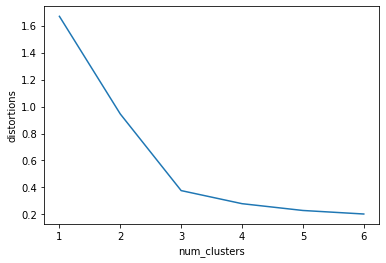

In [20]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# 4- Display dominant colors


<p>We have loaded the following image using the <code>imread()</code> function of the <code>image</code> class of <code>matplotlib</code>.</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg" alt></p>
<p>To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: <p>
<code>converted_pixel = standardized_pixel * pixel_std / 255</code></p></p>
<p>The RGB values are stored in a data frame, <code>batman_df</code>. The scaled RGB values are stored in columns, <code>scaled_red</code>, <code>scaled_blue</code> and <code>scaled_green</code>. The cluster centers are stored in the variable <code>cluster_centers</code>, which were generated using the <code>kmeans()</code> function with three clusters.</p>

<ul>
<li>Get standard deviations of each color from the data frame and store it in <code>r_std</code>, <code>g_std</code>, <code>b_std</code>.</li>
<li>For each cluster center, convert the standardized RGB values to scaled values in the range of 0-1.</li>
<li>Display the colors of the cluster centers.</li>
</ul>

In [35]:
colors = []
cluster_centers, _ = kmeans(batman_df[['scaled_red','scaled_green',
                                       'scaled_blue'
]], 3)

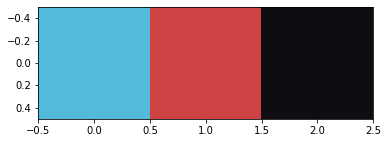

In [36]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

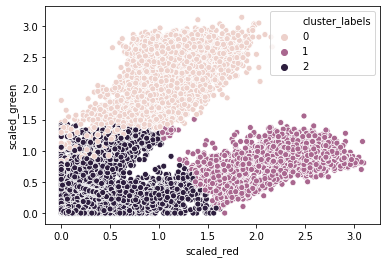

In [37]:
# Assign cluster labels
batman_df['cluster_labels'], distortion_list = vq(batman_df[['scaled_red','scaled_green',
                                       'scaled_blue']], cluster_centers)

# Plot clusters
sns.scatterplot(x='scaled_red', y='scaled_green', 
                hue='cluster_labels', data = batman_df)
plt.show()

# 5- Document clustering


video

# 6- TF-IDF of movie plots

<p>Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.</p>
<p>Use the <code>TfidfVectorizer</code> class to perform the TF-IDF of movie plots stored in the list <code>plots</code>. The <code>remove_noise()</code> function is available to use as a <code>tokenizer</code> in the <code>TfidfVectorizer</code> class. The <code>.fit_transform()</code> method fits the data into the <code>TfidfVectorizer</code> objects and then generates the TF-IDF sparse matrix.</p>
<p><strong>Note: It takes a few seconds to run the <code>.fit_transform()</code> method.</strong></p>

In [43]:
# importing and preprocessing

movie=pd.read_csv('datasets/movies_plot.csv')
plots=movie['Plot']


In [45]:
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

<ul>
<li>Import <code>TfidfVectorizer</code> class from <code>sklearn</code>.</li>
<li>Initialize the <code>TfidfVectorizer</code> class with minimum and maximum frequencies of 0.1 and 0.75, and 50 maximum features.</li>
<li>Use the <code>fit_transform()</code> method on the initialized <code>TfidfVectorizer</code> class with the list plots.</li>
</ul>

In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MohammedTaysser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [48]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50, min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

# 7- Top terms in movie clusters



<p>Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the <code>.todense()</code> method to convert the sparse matrix, <code>tfidf_matrix</code> to a normal matrix for the <code>kmeans()</code> function to process. Then, use the <code>.get_feature_names()</code> method to get a list of terms in the <code>tfidf_vectorizer</code> object. The <code>zip()</code> function in Python joins two lists.</p>
<p>The <code>tfidf_vectorizer</code> object and sparse matrix, <code>tfidf_matrix</code>, from the previous have been retained in this exercise. <code>kmeans</code> has been imported from SciPy.</p>
<p>With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.</p>

<ul>
<li>Generate cluster centers through the <code>kmeans()</code> function.</li>
<li>Generate a list of terms from the <code>tfidf_vectorizer</code> object.</li>
<li>Print top 3 terms of each cluster.</li>
</ul>

In [49]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters) 

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['her', 'she', 'him']
['him', 'who', 'they']


# 8- Clustering with multiple features


video

# 9- Clustering with many features

# 10- Basic checks on clusters


<p>In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (<code>pac</code>), Dribbling (<code>dri</code>) and Shooting (<code>sho</code>) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.</p>
<p>The data is stored in a Pandas data frame, <code>fifa</code>. The scaled column names are present in a list <code>scaled_features</code>. The cluster labels are stored in the <code>cluster_labels</code> column. Recall the <code>.count()</code> and <code>.mean()</code> methods in Pandas help you find the number of observations and mean of observations in a data frame.</p>

<ul>
<li>Print the size of the clusters.</li>
<li>Print the mean values of the wages of the players in each cluster. <code>eur_wage</code> is the column name that stores the wages of a player in Euros.</li>
</ul>

In [ ]:
# Do not run this cell


# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

# 11- FIFA 18: what makes a complete player?

<p>The overall level of a player in FIFA 18 is defined by six characteristics: pace (<code>pac</code>), shooting (<code>sho</code>), passing (<code>pas</code>), dribbling (<code>dri</code>), defending (<code>def</code>), physical (<code>phy</code>).</p>
<p>Here is a sample card:</p>
<p><img src="https://media.contentapi.ea.com/content/dam/ea/easports/fifa/features/2017/top100-ratings/10-1/fut18-top100-hazard-lg.jpg" alt="Eden Hazard Player Card"></p>
<p>In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, <code>fifa</code>. <code>features</code> is the list of these column names and <code>scaled_features</code> is the list of columns which contains their scaled values. The following have been pre-loaded: <code>kmeans</code>, <code>vq</code> from <code>scipy.cluster.vq</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>.</p>

In [66]:
# importing and processing, by me

fifa=pd.read_csv('datasets/fifa_18_sample_data.csv')


features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features = ['scaled_pac',  'scaled_sho', 'scaled_pas',
                   'scaled_dri', 'scaled_def', 'scaled_phy']


#scalling by whiten
for col in features:
    fifa['scaled_' + col] = whiten(fifa[col])

In [67]:
fifa[scaled_features + features]

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy,pac,sho,pas,dri,def,phy
0,7.743447,6.789714,9.291969,9.534738,1.649258,9.374085,90,93,82,90,33,80
1,7.657409,6.570691,9.745236,10.170387,1.299416,7.147740,89,90,86,96,26,61
2,7.915524,6.132645,8.952019,10.064446,1.499326,7.030564,92,84,79,95,30,60
3,7.055141,6.570691,8.952019,9.216914,2.099056,9.491261,82,90,79,87,42,81
4,7.829485,6.570691,10.765086,9.428797,2.998652,10.663022,91,90,95,89,60,91
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.141179,4.453469,7.818852,7.627791,3.748315,8.319501,83,61,69,72,75,71
996,6.194758,4.526476,8.385435,7.309966,3.748315,9.491261,72,62,74,69,75,81
997,3.097379,5.110538,9.291969,7.627791,3.148584,8.553853,36,70,82,72,63,73
998,6.797026,5.475576,8.385435,8.475323,1.749214,9.022557,79,75,74,80,35,77


- Use the kmeans() algorithm to create 2 clusters using the scaled features.
- Assign cluster labels to each row and print cluster centers using the .mean() method of Pandas.
- Plot a bar chart of scaled attributes of each cluster center using the .plot() method of Pandas.
- Print the names of top 5 players in each cluster, using the name column.

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.684385    5.427481    8.455351    8.513096    2.504167   
1                 5.444516    3.664623    7.165875    6.759972    3.967897   

                scaled_phy  
cluster_labels              
0                 8.336310  
1                 9.210371  


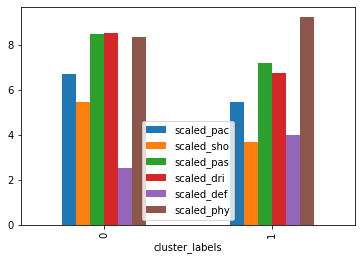

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [68]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of top 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])